# Predykcja - regresja i klasyfikacja

Linia:
%matplotlib inline  
pozwala na wyświetlanie wykresów bez użycia plt.show()

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

## Regresja liniowa
Metoda ta zakłada, że zależność między zmienną objaśnianą a objaśniającą jest liniowa, tzn. próbujemy znaleźć funkcję:

y = a * x + b

najlepiej opisującą punkty ze zbioru, gdzie:

- y - zmienna objaśniana,
- x - zmienna objaśniająca,
- a - współczynnik kierunkowy (ang. *slope*),
- b - wyraz wolny (ang. *intercept*).

Do przykładu regresji wykorzystamy wygenerowane punkty losowo oddalone od prostej o współczynniku kierunkowym a = 2 i wyrazie wolnym b = -3.

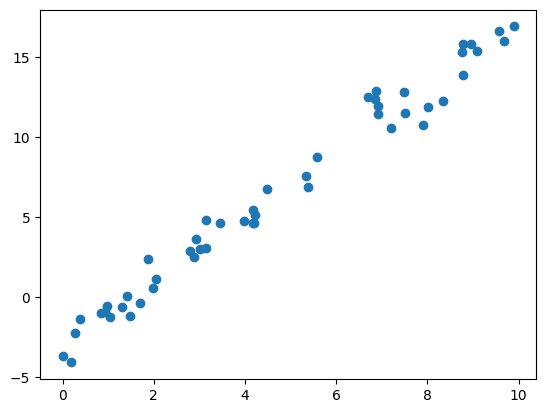

In [8]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 3 + rng.randn(50)
plt.scatter(x, y);

Importujemy model dla regresji liniowej z pakietu scikit-learn (sklearn) i tworzymy odpowiedni obiekt. Przy tworzeniu obiektu możemy ustawić wartości dla hiperparametrów modelu. Jednym z takich parametrów jest *fit_intercept*, który oznacza, czy model ma wyznaczyć wartość dla wyrazu wolnego **b**.

In [3]:
!pip install scikit-learn

^C


In [9]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model

LinearRegression()

Dane objaśniające powinny mieć wymiar $<$ilość próbek$>$ x $<$ilość wymiarów/cech$>$, dlatego musimy zmienić wymiary dla **x**.

In [10]:
X = x[:, np.newaxis]
X.shape

(50, 1)

Trenujemy model na danych. Możemy też podejrzeć wyznaczone wartości dla parametrów modelu **a** i **b**.

In [11]:
model.fit(X, y)
# a
model.coef_ 

array([2.02720881])

In [12]:
#b
model.intercept_ 

np.float64(-2.9985770855532)

Oraz dokładnbość modelu.

In [13]:
model.score(X, y)

0.9790800609430612

Zastosowanie wyznaczonego modelu regresji liniowej dla "nowych" danych.

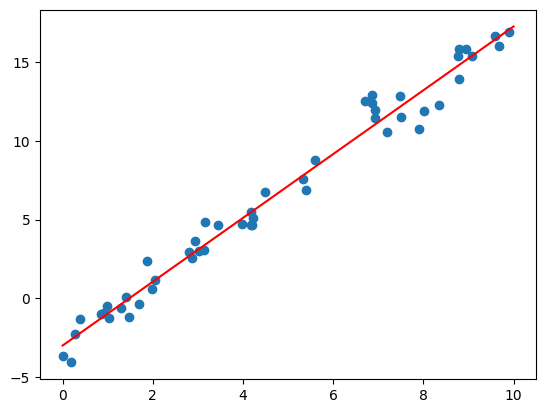

In [14]:
xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

# Wizualizacja wyników
plt.scatter(x, y)
plt.plot(xfit, yfit,'-r');

### Zadanie 1. (0,5 pkt)
> Korzystając z danych churn.txt i modelu regresji liniowej, wyznacz dokładną stawkę za minutę połączenia.

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
df = pd.read_csv("churn.txt")

model = LinearRegression(fit_intercept=True)
x = df["Day Mins"]
y = df["Day Charge"]
X = np.array(x)
X = X[:, np.newaxis]
model.fit(X, y)

xfit = np.linspace(1, 1, 1)
print("Minuta: ", xfit)
print("Stawka za minutę połączenia według modelu: ", model.predict(xfit[:, np.newaxis]))

Minuta:  [1.]
Stawka za minutę połączenia według modelu:  [0.17061304]


Szukamy zależności pomiędzy wagą ciała a wagą mózgu dla ssaków w postaci funkcji:

y = a * x,

gdzie *x* oznacza wagę mózgu, zaś *y* wagę ciała.

Wczytujemy odpowiedni plik.

In [54]:
import pandas as pd

df = pd.read_csv('brain_body.csv', index_col='Index')
df.head()

,BrainWeight,BodyWeight
Index,,
1,3.385,44.5
2,0.480,15.5
3,1.350,8.1
4,465.000,423.0
5,36.330,119.5


### Zadanie 2. (0,5 pkt)
> Zbadaj, czy istnieje korelacja pomiędzy badanymi zmiennymi.

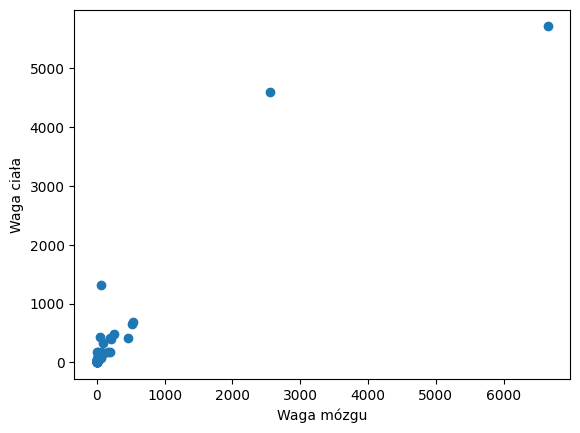

Być może korelacja istnieje, na pierwszy rzut oka nie widać jej bez znormalizowania danych.


In [56]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(df['BrainWeight'],df['BodyWeight'])
plt.xlabel('Waga mózgu')
plt.ylabel('Waga ciała')
plt.show()

print("Być może korelacja istnieje, na pierwszy rzut oka nie widać jej bez znormalizowania danych.")

### Zadanie 3. (0,5 pkt)
> Utwórz obiekt modelu regresji liniowej odpowiedni dla zależności z powyższego problemu.
>
> Przygotuj odpowiednio zmienne objaśniającą (nazwij ją *X*) i objaśnianą (nazwij ją *y*).

In [57]:
model = LinearRegression(fit_intercept=True)
x = df["BrainWeight"]
y = df["BodyWeight"]
X = np.array(x)
X = X[:, np.newaxis]
# model.fit(X, y)

# xfit = np.linspace(0, 10, 7000)

Dzielimy zbiór na testowy i uczący.

In [58]:
from sklearn.model_selection import train_test_split

X1, X2, y1, y2 = train_test_split(X, y, random_state=0,
                                  train_size=0.6)
print ('Rozmiar zbioru uczącego = %d i zbiru testowego = %d' % (y1.size, y2.size))

Rozmiar zbioru uczącego = 37 i zbiru testowego = 25


Trenujemy i oceniamy model przy pomocy błędu średniokwadratowego.

In [59]:
from sklearn.metrics import mean_squared_error

model.fit(X1, y1)
y2_model = model.predict(X2)

mean_squared_error(y2, y2_model)

1490805.6876027253

Wizualizacja wyników.

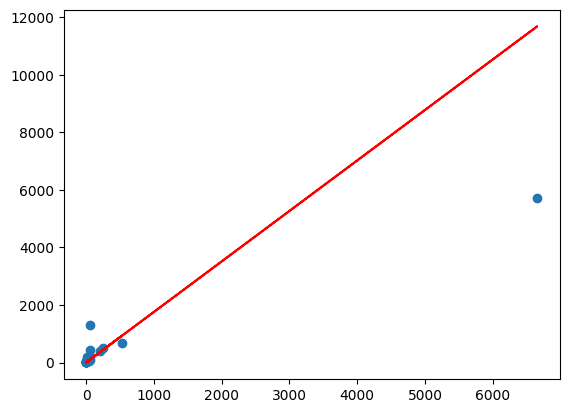

In [60]:
plt.scatter(X2, y2)
plt.plot(X2, y2_model,'-r');

### Zadanie 4. (1,5 pkt)
> Usuń z analizowanego zbioru danych punkty oddalone i powtórz regresję. Porównaj wyniki. Porównaj też dokładność modelu na danych uczących i testowych.

Blad na danych treningowych 41814.0281741888
Blad na danych testowych 21632.451114288262


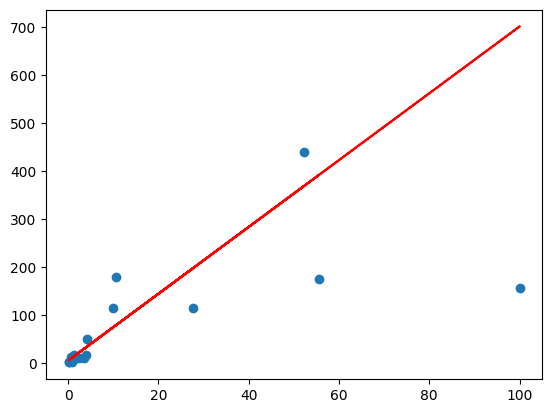

In [131]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

poly_model = make_pipeline(PolynomialFeatures(1),
                           LinearRegression())

x = df["BrainWeight"]
y = df["BodyWeight"]
x = x[(x < x.quantile(0.85)) & (x > x.quantile(0.15))]
y = y.loc[x.index.to_list()]
X = np.array(x)
X = X[:, np.newaxis]

X1, X2, y1, y2 = train_test_split(X, y, random_state=0,
                                  train_size=0.6)

poly_model.fit(X1, y1)


y2_model = poly_model.predict(X2)
y1_model = poly_model.predict(X1)

print("Blad na danych treningowych", mean_squared_error(y1, y1_model))
print("Blad na danych testowych", mean_squared_error(y2, y2_model))

plt.scatter(X2, y2)
plt.plot(X2, y2_model,'-r')

Jeżeli proces składa się z kilku etapów, można wykorzystać klasę *Pipeline*.

http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html

W poniższym przykładzie zdefiniowano proces składający się z transformacji danych (*PolynomialFeatures*) i regresji liniowej.

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

poly_model = make_pipeline(PolynomialFeatures(7),
                           LinearRegression())


df["col"].quantile(0.99)
poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

### Zadanie 5. (0,5 pkt)
> Przetestuj inne wartości (mniejsze i większe od przykładowej) jako argument przy tworzeniu obiektu klasy *PolynomialFeatures*. Co możesz powiedzieć o zachowaniu modelu?

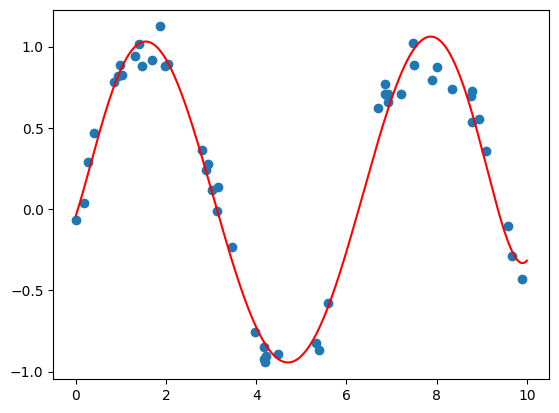

In [165]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

poly_model = make_pipeline(PolynomialFeatures(6),
                           LinearRegression())

rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)
X = np.array(x)
X = X[:, np.newaxis]
poly_model.fit(X, y)

xfit = np.linspace(0,10,1000)
y1_model = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, y1_model,'-r')

Występuje overfitting.

### Zadanie 6. (1,5 pkt)
> Dla powyższych losowych danych przetestuj regresję z regularyzacją $L_2$ oraz z regularyzacją $L_1$. Narysuj wykres i oblicz błędy średniokwadratowy i średni bezwzględny dla trzech modeli. Porównaj wyniki.
>
> **UWAGA:** Obie miary błędu modelu są dostępne w module *sklearn.metrics*.

http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

POLYNOMIAL MSE: 0.010740100834694748 MAE: 0.08443342574917928
RIDGE MSE: 0.014977084234201622 MAE: 0.09952227213451853
LASSO MSE: 0.2286835649352621 MAE: 0.38132493203637163


c:\Users\student.KIOLAB\Desktop\OWiSR_lab1-gr1\OWiSR_lab1-gr1\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.495e+00, tolerance: 2.065e-03
  model = cd_fast.enet_coordinate_descent(


Text(0.5, 1.0, 'Red - polynomial, Green - ridge, Blue - lasso')

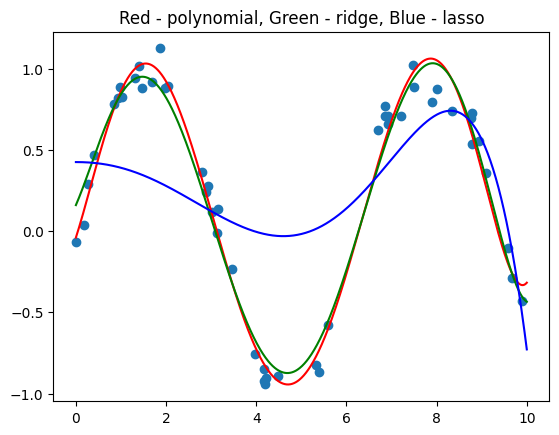

In [179]:
# Miejsce na rozwiązanie
from sklearn.linear_model import Ridge # L2
from sklearn.linear_model import Lasso # L1
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

poly_model = make_pipeline(PolynomialFeatures(6),
                           LinearRegression())

ridge_model = make_pipeline(PolynomialFeatures(6),
                           Ridge())

lasso_model = make_pipeline(PolynomialFeatures(6),
                           Lasso())


rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)
X = np.array(x)
X = X[:, np.newaxis]
poly_model.fit(X, y)
ridge_model.fit(X, y)
lasso_model.fit(X, y)

xfit = np.linspace(0,10,1000)
poly1 = poly_model.predict(xfit[:, np.newaxis])
ridge1 = ridge_model.predict(xfit[:, np.newaxis])
lasso1 = lasso_model.predict(xfit[:, np.newaxis])

poly2 = poly_model.predict(X)
ridge2 = ridge_model.predict(X)
lasso2 = lasso_model.predict(X)
print(f"POLYNOMIAL MSE: {mean_squared_error(y, poly2)} MAE: {mean_absolute_error(y, poly2)}")
print(f"RIDGE MSE: {mean_squared_error(y, ridge2)} MAE: {mean_absolute_error(y, ridge2)}")
print(f"LASSO MSE: {mean_squared_error(y, lasso2)} MAE: {mean_absolute_error(y, lasso2)}")

plt.scatter(x, y)
plt.plot(xfit, poly1,'-r')
plt.plot(xfit, ridge1,'-g')
plt.plot(xfit, lasso1,'-b')
plt.title('Red - polynomial, Green - ridge, Blue - lasso')

Poniżej przedstwiono przykład tworzenia regresji liniowej jako funkcji dwóch zmiennych.

In [180]:
df = pd.read_csv("boston_data.csv")
df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [181]:
X = pd.DataFrame(df.iloc[:,:-1])
y = pd.DataFrame(df.iloc[:,-1])

In [182]:
X1, X2, y1, y2 = train_test_split(X, y, random_state=0,
                                  train_size=0.8)

In [186]:
x_train = X1[['RM', 'LSTAT']].values.reshape(-1,2)
x_test = X2[['RM', 'LSTAT']].values.reshape(-1,2)
model = LinearRegression(fit_intercept=False)
model.fit(x_train,y1)
y2_model = model.predict(x_test)
mean_squared_error(y2, y2_model)

32.64760531599554

### Zadanie 7. (2 pkt)
> Wczytaj plik *winequality-red.csv* i podziel go na zbiór uczący i testowy w stosunku 7:3. Zbadaj korelację pomiędzy dostępnymi atrybutami a jakością wina i wybierz kilka (min. 2) do utworzenia modelu. Jeżeli jest taka potrzeba, zastosuj model wielomianowy. Skorzystaj z regularyzacji $L_2$ i zbadaj błędy średniokwadratowy i średni bezwględny oraz współczynnik determinacji. Porównaj wyniki.
>
> **UWAGA:** Współczynnik determinacji jest dostępny w module sklearn.metrics.

MSE:  0.5963821744694032
MAE:  0.6493839307341054
R2:  -0.010817244863395414


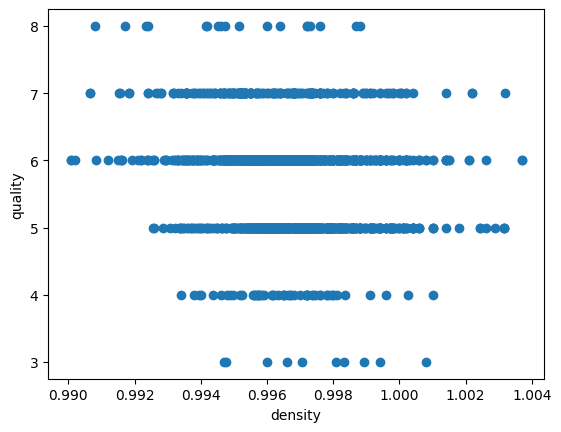

In [228]:
from sklearn.linear_model import Ridge 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

df = pd.read_csv("winequality-red.csv", delimiter=';')
X = pd.DataFrame(df.iloc[:,:-1])
y = pd.DataFrame(df.iloc[:,-1])

X1, X2, y1, y2 = train_test_split(X, y, random_state=0,
                                  train_size=0.7)

x_train = X1[['density', 'pH']].values.reshape(-1,2)
x_test = X2[['density', 'pH']].values.reshape(-1,2)
model = Ridge(fit_intercept=False)
model.fit(x_train,y1)
y2_model = model.predict(x_test)

print("MSE: ", mean_squared_error(y2, y2_model))
print("MAE: ", mean_absolute_error(y2, y2_model))
print("R2: ", r2_score(y2, y2_model))


fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(df['density'],df['quality'])
plt.xlabel('density')
plt.ylabel('quality')
plt.show()

## Naiwny klasyfikator Bayesa

In [232]:
from sklearn.datasets import make_blobs
from sklearn.naive_bayes import GaussianNB

Tworzymy przykładowe dane.

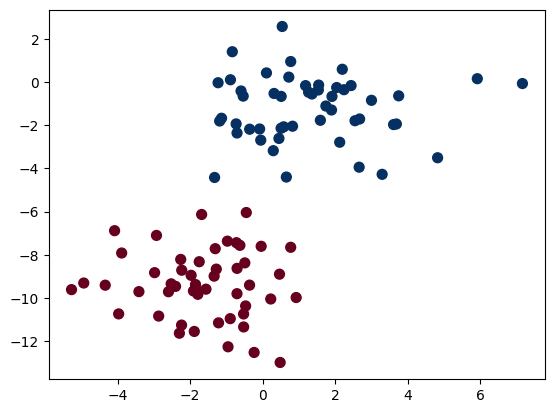

In [242]:
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu');

Tworzymy i uczymy model.

In [243]:
model = GaussianNB()
model.fit(X, y)

GaussianNB()

In [244]:
model.score(X,y)

1.0

Klasyfikacja nowych danych.

In [245]:
rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)
ynew = model.predict(Xnew)

In [246]:
ynew

array([1, 1, 1, ..., 0, 1, 1], shape=(2000,))

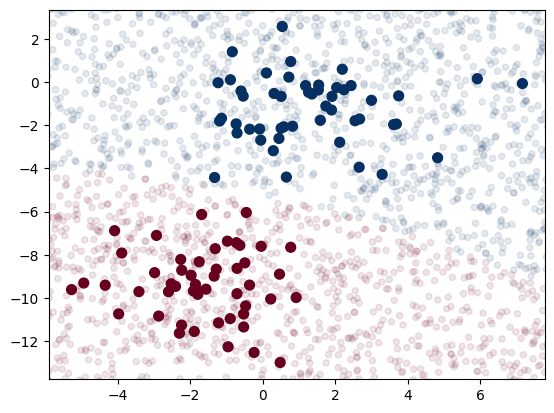

In [247]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.1)
plt.axis(lim);

Klasyfikacja z prawdopopodobieństwem dla naszych dwóch klas.

In [248]:
yprob = model.predict_proba(Xnew)
yprob[-8:].round(2)

array([[0.89, 0.11],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.15, 0.85]])

Wyrysowanie klasyfikacji dla NKB dla danych treningowych.

ValueError: Length of X (60) must be one larger than the number of columns in C (60)

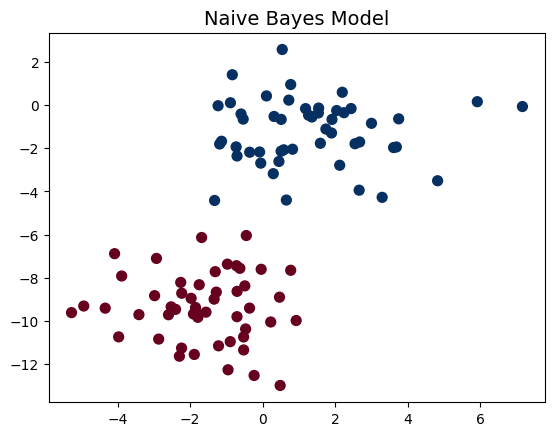

In [249]:
fig, ax = plt.subplots()

ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
ax.set_title('Naive Bayes Model', size=14)

xlim = (-8, 8)
ylim = (-15, 5)

xg = np.linspace(xlim[0], xlim[1], 60)
yg = np.linspace(ylim[0], ylim[1], 40)
xx, yy = np.meshgrid(xg, yg)
Xgrid = np.vstack([xx.ravel(), yy.ravel()]).T

for label, color in enumerate(['red', 'blue']):
    mask = (y == label)
    mu, std = X[mask].mean(0), X[mask].std(0)
    P = np.exp(-0.5 * (Xgrid - mu) ** 2 / std ** 2).prod(1)
    Pm = np.ma.masked_array(P, P < 0.03)
    ax.pcolorfast(xg, yg, Pm.reshape(xx.shape), alpha=0.5,
                  cmap=color.title() + 's')
    ax.contour(xx, yy, P.reshape(xx.shape),
               levels=[0.01, 0.1, 0.5, 0.9],
               colors=color, alpha=0.2)
    
ax.set(xlim=xlim, ylim=ylim)


### Zadanie 8. (2 pkt)
> Dla zbioru danych Irys wykonaj kolasyfikację z wykorzystaniem Naiwnego klasyfikatora Bayesa. Podziel dane na treningowe i testowe w stosunku 1:1. Wyznacz liczbę błędnie zaklasyfikowanych przypadków.

In [250]:
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True)


In [270]:
X1, X2, y1, y2 = train_test_split(X, y, random_state=0,
                                  train_size=0.5)
model = GaussianNB()
model.fit(X, y)

ynew = model.predict(X2)
ile_zle = 0
for i in range(len(ynew)):
    if ynew[i] != y2[i]:
        ile_zle+=1

print("Blednie zaklasyfikowanych: ", ile_zle)
print(model.score(X,y))



Blednie zaklasyfikowanych:  4
0.96
